In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price?select=Indian_housing_Mumbai_data.csv

House Type: Type of house (e.g., apartment, villa, duplex).


House Size: Size of the house in square feet or square meters.

Location: Specific area or neighborhood where the property is located.

City: City in India where the property is situated.

Latitude: Geographic latitude coordinates of the property location.

Longitude: Geographic longitude coordinates of the property location.

Price: Rental price of the house.

Currency: Currency in which the price is denoted (e.g., INR - Indian Rupees).

Number of Bathrooms: Total number of bathrooms in the house.

Number of Balconies: Total number of balconies in the house.

Negotiability: Indicates whether the price is negotiable (Yes/No).

Price per Square Foot: Price of the house per square foot.

Verification Date: Date when the rental information was verified.

Description: Additional description or details about the property.

Security Deposit: Amount of security deposit required for renting the property.

Status: Indicates the furnishing status of the property (furnished, unfurnished, semi-furnished).

In [2]:
Delhi = pd.read_csv(r'../data/indian_houses/Indian_housing_Delhi_data.csv')
Delhi['city'] = 'Delhi'


In [3]:
Mumbai = pd.read_csv(r'../data/indian_houses/Indian_housing_Mumbai_data.csv')
Mumbai['city'] = 'Mumbai'


In [4]:
Pune = pd.read_csv(r'../data/indian_houses/Indian_housing_Mumbai_data.csv')
Pune['city'] = 'Pune'

In [5]:
df = pd.concat([Delhi, Mumbai, Pune], axis=0)
del Pune, Mumbai, Delhi
df.head(3)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished


In [6]:
df.numBathrooms.unique()

array([ 1.,  3.,  2.,  4.,  8.,  5.,  6.,  7.,  9., nan, 10.])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        15000 non-null  object 
 1   house_size        15000 non-null  object 
 2   location          15000 non-null  object 
 3   city              15000 non-null  object 
 4   latitude          15000 non-null  float64
 5   longitude         15000 non-null  float64
 6   price             15000 non-null  int64  
 7   currency          15000 non-null  object 
 8   numBathrooms      14947 non-null  float64
 9   numBalconies      4203 non-null   float64
 10  isNegotiable      1321 non-null   object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  15000 non-null  object 
 13  description       14559 non-null  object 
 14  SecurityDeposit   15000 non-null  object 
 15  Status            15000 non-null  object 
dtypes: float64(5), int64(1), object(10)
memory usa

In [8]:
df.select_dtypes(include='number').describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,15000.000000,15000.000000,1.500000e+04,14947.000000,4203.000000,0.0
mean,22.298762,74.360317,1.156541e+05,2.328360,1.992624,NaN
std,4.455814,2.043733,1.895849e+05,0.997736,0.784605,NaN
min,17.468220,72.719688,2.800000e+03,1.000000,1.000000,NaN
25%,19.115334,72.861771,2.300000e+04,2.000000,2.000000,NaN
50%,19.195205,72.995323,4.500000e+04,2.000000,2.000000,NaN
75%,28.544495,77.138855,1.100000e+05,3.000000,2.000000,NaN
max,30.888254,91.792137,3.010101e+06,10.000000,8.000000,NaN


In [9]:
df.select_dtypes(include=object).describe()

,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
count,15000,15000,15000,15000,15000,1321,15000,14559,15000,15000
unique,32,794,477,3,1,1,58,8300,672,3
top,2 BHK Apartment,"5,896 sq ft",Andheri West,Delhi,INR,Negotiable,Posted a month ago,AVAILABLE 2 BHK FLAT AT ANDHERI WEST \nVERY BI...,No Deposit,Semi-Furnished
freq,4526,664,724,5000,15000,1321,2414,44,9680,6074


In [10]:
df.drop(columns=['currency', 'priceSqFt', 'description', 'latitude', 'longitude', 'numBalconies'], inplace=True)

In [11]:
df.SecurityDeposit

0       No Deposit
1       No Deposit
2       No Deposit
3       No Deposit
4       No Deposit
           ...    
4995      1,50,000
4996      2,50,000
4997      2,00,000
4998      2,00,000
4999        80,000
Name: SecurityDeposit, Length: 15000, dtype: object

In [12]:
df.house_size = df.house_size.apply(lambda x: int(x.split()[0].replace(',', '')))
df.SecurityDeposit = df.SecurityDeposit.apply(lambda x: np.nan if x == 'No Deposit' else x.replace(',', '')).astype('float')
df.isNegotiable = df.isNegotiable.apply(lambda x: 1 if x =='Negotiable' else 0).astype('object')
df.numBathrooms = df.numBathrooms.fillna(df.numBathrooms.median())

In [13]:
@np.vectorize
def verification_date(date):
    splitted_date = date.split()[1:3]
    if splitted_date[0].isdigit():
        if splitted_date[1] in {'minutes', 'hours', 'seconds'}:
            return '<1_day'
        elif splitted_date[1] == 'days':
            return '<1_month'
        elif splitted_date[1] == 'month':
            if splitted_date[0] < 6:
                return '<6_month'
            return '<1_year'
        return '>1_year'
    else:
        if splitted_date[1] in {'minute', 'hour'}:
            return '<1_day'
        elif splitted_date[1] == 'day':
            return '<1_month'
        elif splitted_date[1] == 'month':
            return '<1_year'
        elif splitted_date[1] == 'year':
            return '>1_year'

df.verificationDate = df.verificationDate.apply(verification_date)

In [14]:
df.head()

,house_type,house_size,location,city,price,numBathrooms,isNegotiable,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400,Kalkaji,Delhi,22000,1.0,0,<1_month,NaN,Furnished
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,20000,1.0,0,<1_month,NaN,Furnished
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,8500,1.0,0,<1_month,NaN,Semi-Furnished
3,3 BHK Independent House,1020,Model Town,Delhi,48000,3.0,0,>1_year,NaN,Furnished
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,20000,2.0,0,>1_year,NaN,Unfurnished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        15000 non-null  object 
 1   house_size        15000 non-null  int64  
 2   location          15000 non-null  object 
 3   city              15000 non-null  object 
 4   price             15000 non-null  int64  
 5   numBathrooms      15000 non-null  float64
 6   isNegotiable      15000 non-null  object 
 7   verificationDate  15000 non-null  object 
 8   SecurityDeposit   5320 non-null   float64
 9   Status            15000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [16]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=333) 
X_train.SecurityDeposit = X_train.SecurityDeposit.fillna(X_train.SecurityDeposit.median())
X_test.SecurityDeposit = X_test.SecurityDeposit.fillna(X_train.SecurityDeposit.median())

categorical = list(X.select_dtypes(exclude='number').columns)
numeric = list(X.select_dtypes(include='number').columns)
del df

In [17]:
y_train.describe()

count    1.125000e+04
mean     1.146758e+05
std      1.854250e+05
min      2.800000e+03
25%      2.300000e+04
50%      4.500000e+04
75%      1.100000e+05
max      3.010101e+06
Name: price, dtype: float64

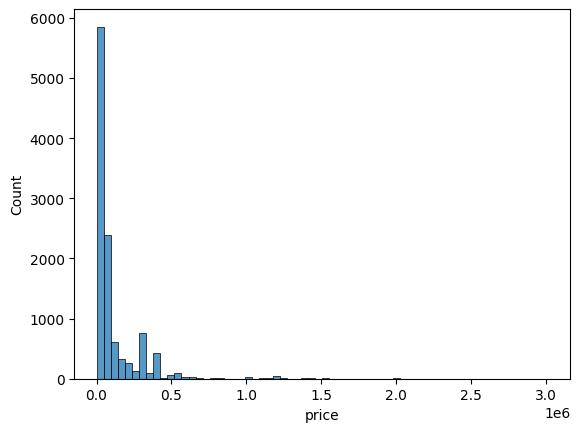

In [18]:
sns.histplot(y_train, bins=64);

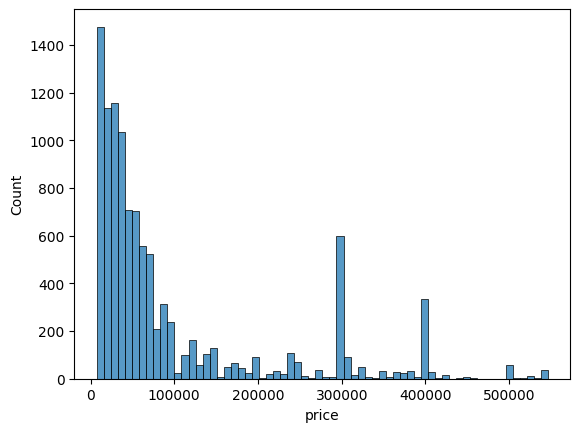

In [19]:
q01 = y_train.quantile(0.025)
q09 = y_train.quantile(0.975)
not_outliers = y_train.apply(lambda x: q01<x<q09)
y_train = y_train[not_outliers]
X_train = X_train[not_outliers]
sns.histplot(y_train, bins=64);

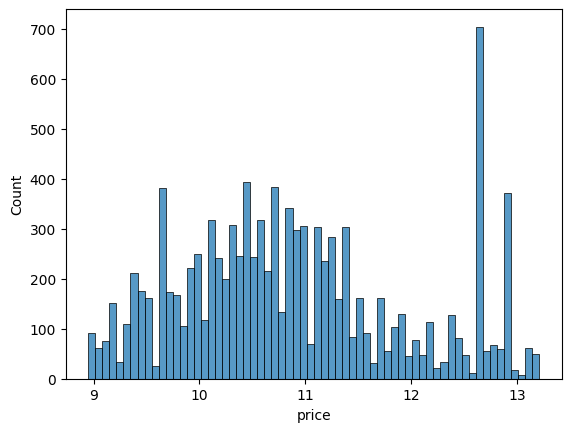

In [20]:
sns.histplot(np.log(y_train), bins=64);

In [21]:
y_train = np.log(y_train)
y_test = np.log(y_test)

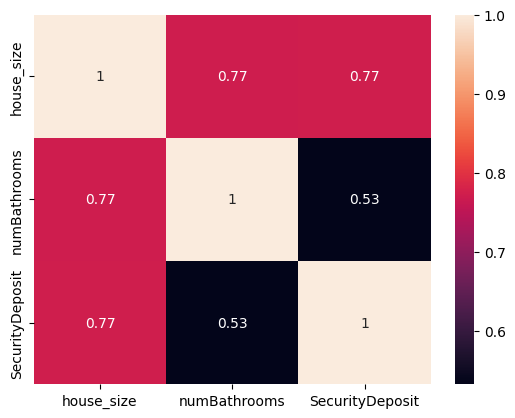

In [22]:
sns.heatmap(X_train[numeric].corr(), annot=True);

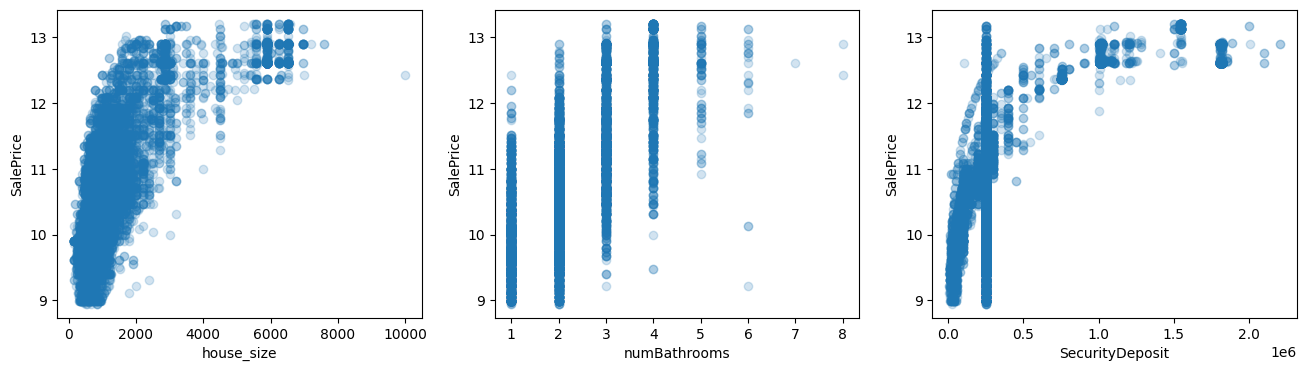

In [23]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, feature in enumerate(numeric):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")

# попробовать депозит заполнить средним или медианой и прогнать снова

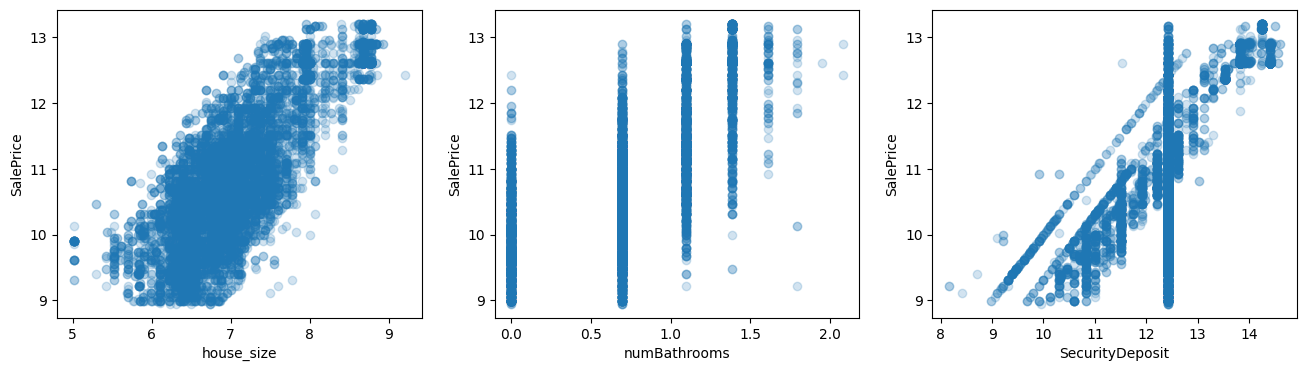

In [24]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, feature in enumerate(numeric):
    axs[i].scatter(np.log(X_train[feature]), y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")

In [25]:
X_train.house_size = np.log(X_train.house_size)
X_train.SecurityDeposit = np.log(X_train.SecurityDeposit)
X_test.house_size = np.log(X_test.house_size)
X_test.SecurityDeposit = np.log(X_test.SecurityDeposit)

In [26]:
ct = ColumnTransformer(
    [
        ('scaler', RobustScaler(), numeric),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical)
     ],
)

In [27]:
alphas = np.linspace(0.01, 10, 50)

lasso_pipeline = Pipeline(steps=(

    ('transformations', ct),
    ('lasso_model', Lasso())
))

ridge_pipeline = Pipeline(steps=(

    ('transformations', ct),
    ('ridge_model', Ridge())
))

searcher = GridSearchCV(lasso_pipeline, param_grid=[{'lasso_model__alpha': alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)
lasso_alpha = searcher.best_params_['lasso_model__alpha']

searcher = GridSearchCV(ridge_pipeline, param_grid=[{'ridge_model__alpha': alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)
ridge_alpha = searcher.best_params_['ridge_model__alpha']

In [28]:
ridge_pipeline = Pipeline(steps=(

    ('transformations', ct),
    ('ridge_model', Ridge(ridge_alpha))
))

lasso_pipeline = Pipeline(steps=(

    ('transformations', ct),
    ('lasso_model', Lasso(lasso_alpha))
))

ridge_model = ridge_pipeline.fit(X_train, y_train)

squared_error = mean_squared_error(ridge_model.predict(X_train), y_train)
y_pred_ridge = ridge_model.predict(X_test)
print('Ridge:', round(root_mean_squared_error(y_pred_ridge, y_test),2))
print('R2 ridge', round(r2_score(y_pred_ridge, y_test), 2))

lasso_model = lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print('Lasso:', round(root_mean_squared_error(y_pred_lasso, y_test), 2))
print('R2 lasso', round(r2_score(y_pred_lasso, y_test), 2))


Ridge: 0.33
R2 ridge 0.91
Lasso: 0.55
R2 lasso 0.68


Text(0.5, 0, 'pred_y')

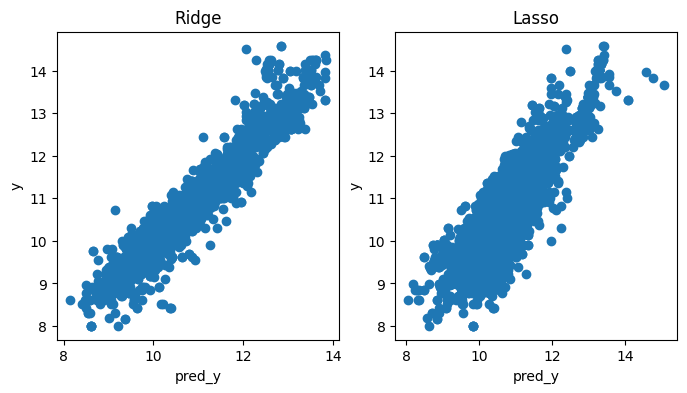

In [29]:
fig, axs = plt.subplots(figsize=(8, 4), ncols=2)
axs[0].scatter(y_pred_ridge, y_test)
axs[0].set_title('Ridge')
axs[0].set_ylabel("y")
axs[0].set_xlabel("pred_y")

axs[1].scatter(y_pred_lasso, y_test)
axs[1].set_title('Lasso')
axs[1].set_ylabel("y")
axs[1].set_xlabel("pred_y")

In [30]:
root_mean_squared_error(np.exp(y_pred_ridge), y_test), 

(np.float64(166628.4916752346),)

Text(0.5, 0, 'pred_y')

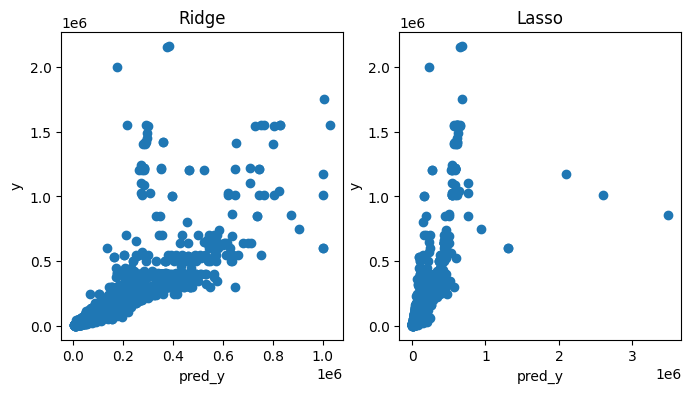

In [31]:
fig, axs = plt.subplots(figsize=(8, 4), ncols=2)
axs[0].scatter(np.exp(y_pred_ridge), np.exp(y_test))
axs[0].set_title('Ridge')
axs[0].set_ylabel("y")
axs[0].set_xlabel("pred_y")

axs[1].scatter(np.exp(y_pred_lasso), np.exp(y_test))
axs[1].set_title('Lasso')
axs[1].set_ylabel("y")
axs[1].set_xlabel("pred_y")